# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
#data loading
data=pd.read_csv('SalaryData_Test(1).csv')

In [3]:
#data set is too big becaus of that selecting sampple (5000) for perfoming 
test_df=data.sample(5000)
test_df.shape

(5000, 14)

# Data preprocessing

In [4]:
test_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
4860,40,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
8564,25,Private,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Male,0,0,40,United-States,<=50K
12469,31,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,>50K
13304,38,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,15024,0,45,United-States,>50K
5515,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K


In [5]:
test_df.duplicated().sum()

152

In [6]:
test_df=test_df.drop_duplicates()

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
test_df['workclass']=encoder.fit_transform(test_df['workclass'])
test_df['education']=encoder.fit_transform(test_df['education'])
test_df['maritalstatus']=encoder.fit_transform(test_df['maritalstatus'])
test_df['occupation']=encoder.fit_transform(test_df['occupation'])
test_df['relationship']=encoder.fit_transform(test_df['relationship'])
test_df['race']=encoder.fit_transform(test_df['race'])
test_df['sex']=encoder.fit_transform(test_df['sex'])
test_df['native']=encoder.fit_transform(test_df['native'])
test_df['Salary']=encoder.fit_transform(test_df['Salary'])

# Applying PCA

In [8]:
#normalizing data 
from sklearn.preprocessing import scale
arry=scale(test_df.values)
#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
pca_test_values=pca.fit_transform(arry)
pca_test_values

array([[ 2.14827271, -0.94289393, -0.00442836,  0.10856093,  0.1063055 ,
        -0.92462921],
       [-0.88626857, -0.65183644, -0.81828693,  0.59635147,  0.24585247,
        -0.95283476],
       [ 1.77903594, -0.6347162 , -0.37719014,  0.54536944,  0.6106675 ,
        -0.25780454],
       ...,
       [-0.80522187, -0.2087008 , -0.11131152, -1.22480106, -0.22383104,
         0.19921592],
       [-2.78238371,  1.60481533,  0.14830754, -1.07303202,  0.12668103,
         0.33832763],
       [ 0.19396793, -0.45581456,  1.11577382, -1.92482994, -0.23538105,
        -0.73581134]])

In [9]:
variance=pca.explained_variance_ratio_
var1=np.cumsum(np.round(variance,decimals=4)*100)
var1


array([16.52, 27.17, 35.3 , 43.13, 50.55, 57.77])

In [10]:
finaltest = pd.DataFrame(pca_test_values[:,0:4])
                     
finaltest

,0,1,2,3
0,2.148273,-0.942894,-0.004428,0.108561
1,-0.886269,-0.651836,-0.818287,0.596351
2,1.779036,-0.634716,-0.377190,0.545369
3,1.834768,-0.044793,0.604880,-0.289168
4,0.750758,0.195291,-0.341371,-0.168882
...,...,...,...,...
4843,0.745116,0.682293,-0.242944,0.538473
4844,-1.282536,-0.179649,-0.480802,0.208243
4845,-0.805222,-0.208701,-0.111312,-1.224801
4846,-2.782384,1.604815,0.148308,-1.073032


In [11]:
#data spliting in x & y

In [12]:
x=finaltest
y=test_df["Salary"]

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# SVM Model

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

In [23]:
model=SVC()
param_grid = [{'kernel': ['rbf'], 
               'gamma': [2, 0.1, 0.01, 0.001],
               'C': [ 10, 1,0.5]}]
GSV=GridSearchCV(model,param_grid,cv=10)
GSV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 1, 0.5], 'gamma': [2, 0.1, 0.01, 0.001],
                          'kernel': ['rbf']}])

In [24]:
GSV.best_params_ , GSV.best_score_ 

({'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, 0.9496043727225404)

In [28]:
model = SVC(C=10,gamma=0.1,kernel='rbf')
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 96.1512027491409


array([[1085,   31],
       [  25,  314]], dtype=int64)

In [32]:
model2 = SVC(C=10,gamma=0.1,kernel='linear')
model2.fit(x_train , y_train)
y_pred2 = model2.predict(x_test)
acc2 = accuracy_score(y_test, y_pred2) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred2)

Accuracy = 96.1512027491409


array([[1061,   55],
       [  37,  302]], dtype=int64)

Accuracy of final Model= 95.94501718213058


<AxesSubplot:>

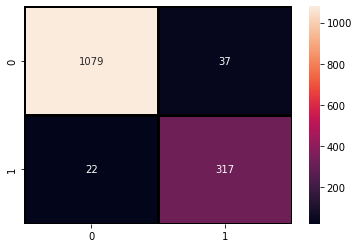

In [27]:
print("Accuracy of final Model=", acc)
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)